# Tutorial
* import dataset
* Dataset tanımı
* Dataset Görselleştirme
* KNN algortiması ne demek
* KNN with sklearn 
* Ödev

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
data=pd.read_csv("data2.csv")

In [39]:
#Gereksiz olanları sileriz ama ondan önce bakmak lazım columns kısmında gereksiz olanalr yoksa silemeye gerek yok
#data.drop(["id","Unnamed: 32"],axis=1,inplace=True)#->Burada gereksiz olan columns ları sildik
data.head()
data.tail()
# M=malignant->Kötü huylu timör
# B=benign->iyi huylu timör


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [40]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [41]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [42]:
M=data[data.diagnosis=="M"]
B=data[data.diagnosis=="B"]


In [43]:
#M.info()
B.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 19 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       357 non-null    int64  
 1   diagnosis                357 non-null    object 
 2   radius_mean              357 non-null    float64
 3   texture_mean             357 non-null    float64
 4   perimeter_mean           357 non-null    float64
 5   area_mean                357 non-null    float64
 6   smoothness_mean          357 non-null    float64
 7   compactness_mean         357 non-null    float64
 8   concavity_mean           357 non-null    float64
 9   concave points_mean      357 non-null    float64
 10  symmetry_mean            357 non-null    float64
 11  fractal_dimension_mean   357 non-null    float64
 12  radius_se                357 non-null    float64
 13  texture_se               357 non-null    float64
 14  perimeter_se             357 n

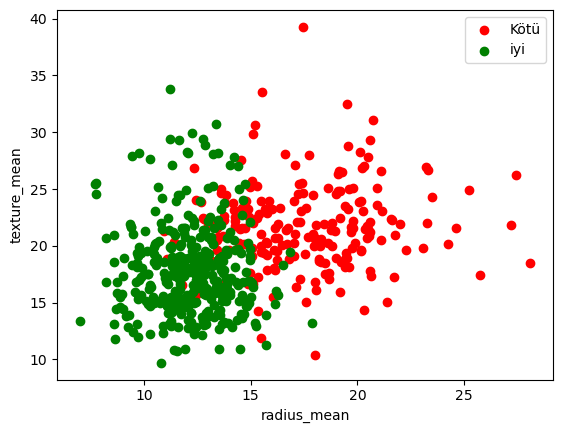

In [44]:
#Scatter plot
plt.scatter(M.radius_mean,M.texture_mean,color="red",label="Kötü")
plt.scatter(B.radius_mean,B.texture_mean,color="green",label="iyi")
plt.legend()#bu komut labelleri göstermek için kullanılır
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.show()

# KNN=K neirest neighbour ->K en yakın komşu 
1)K değeri seç
2)K en yakın data noktaları bul
3)K en yakın komşu arasında hangi classtan kaç tane var hesapla
4)test ettiğimiz point ya da data hangi classa ait tespit et


* K=3 gibi bir değer seçilir bu değer bir tane nokta için yakındaki 3 tane noktayı alır ve bunları iyi mi kötü mü diye filtreler çoğunluk olan gruba göre iyi ya da kötü sonucu çıkarır. Bu k seçme değerlerinde k genellikle tek olan bir sayı seçilir

* mesafe hesaplamak için yapılan formül
* ->eucliden distance=karekok((x2-x1)^2+(y2-y1)^2)
* Bu konuda normalize etmek önemli

In [45]:
data.diagnosis=[1 if each=="M" else 0 for each in data.diagnosis]
y=data.diagnosis.values
x_data=data.drop(["diagnosis"],axis=1)

In [46]:
#Normalization
x=(x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [47]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [54]:
print(x_train.shape)
print(x_train.head())
print(y_train.shape)


(0, 32)
Empty DataFrame
Columns: [id, radius_mean, texture_mean, perimeter_mean, area_mean, smoothness_mean, compactness_mean, concavity_mean, concave points_mean, symmetry_mean, fractal_dimension_mean, radius_se, texture_se, perimeter_se, area_se, smoothness_se, compactness_se, concavity_se, concave points_se, symmetry_se, fractal_dimension_se, radius_worst, texture_worst, perimeter_worst, area_worst, smoothness_worst, compactness_worst, concavity_worst, concave points_worst, symmetry_worst, fractal_dimension_worst, Unnamed: 32]
Index: []

[0 rows x 32 columns]
(0,)


In [50]:
x_train=x_train.dropna()#->Nan içeren satırları kaldırma
y_train=y_train[x_train.index]

In [52]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)#n_neighbors=k buradaki knn deki k değeridir
knn.fit(x_train,y_train)
prediction=knn.predict(x_test)



ValueError: Found array with 0 sample(s) (shape=(0, 32)) while a minimum of 1 is required by KNeighborsClassifier.

In [53]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

# Conclusion
* Doldur